# GATE SIMULATION
###                              data preprocessing
                                                 made by Yangsuseong

In [1]:
import os, glob, csv, codecs
import shutil
import re
import itertools
import math

## 파일 골라내기
    dat_dir 과 슬라이싱 범위는 상황에 따라 변경해야함

In [2]:
#dat_dir = input("Insert Directory : ")
dat_dir = r"C:\Users\BraveHong\Documents\gate_git3"

dat_file_list = glob.glob(dat_dir + '/*.txt')
dat_file_list.sort()
print(dat_file_list)
print(dat_file_list[0][-20:])

['C:\\Users\\BraveHong\\Documents\\gate_git3\\testCoincidences.txt']
testCoincidences.txt


## 파일 읽어들여서 x,y,z 축 값만 남기고 다 버릴거야
    9, 10, 11, 32,33,34 번째 정보
    인덱스로는 8,9,10  31,32,33
        dat_list 리스트에 저장(x1,y1,z1,x2,y2,z2)

In [3]:
# 리스트 청크 함수 (리스트, 원하는 길이)
# 이거 하고나면 차원이 하나가 더 생겨서 언패킹함수를 사용하여 차원축소를 해야함
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

In [4]:
# 언패킹(차원 축소)을 위한 함수
def chain(*iterables):
    # chain('ABC', 'DEF') --> ['A', 'B', 'C', 'D', 'E', 'F']
    for it in iterables:
        for element in it:
            yield element


In [5]:
dat_list_all = []
dat_list_pre = []
dat_list = []
dat_list_xyz = []


#print("--------------" + dat_file_list[i]) + "----------------")
print(str(len(dat_file_list)) + "개의 파일을 변환합니다.")
for i in range(len(dat_file_list)):
    idx = 0
    print(str(i+1) + "번째 파일")
    txt_data = open(dat_file_list[i],'r')
    for j in txt_data:
        j = " ".join(j.split())
        j = j.split(" ")
        dat_list_all.append(j)
        #print(dat_list_all)

1개의 파일을 변환합니다.
1번째 파일


In [6]:
        
dat_len = len(dat_list_all) - 1
    
for i in range(len(dat_list_all) -1):
    #print(i)
    dat_list_pre.append(dat_list_all[i][8])
    dat_list_pre.append(dat_list_all[i][9])
    dat_list_pre.append(dat_list_all[i][10])
    dat_list_pre.append(dat_list_all[i][31])
    dat_list_pre.append(dat_list_all[i][32])
    dat_list_pre.append(dat_list_all[i][33])
        
dat_list.append(list(chunks(dat_list_pre, 3)))
dat_list = list(itertools.chain(*dat_list))
dat_list_xyz.append(list(chunks(dat_list,2)))
dat_list_xyz = list(itertools.chain(*dat_list_xyz))
    
print("Finish")
txt_data.close()

Finish


## 이제 x,y,z 값을 가지고 각 디텍터 번호에 대표 값으로 변경시켜주는 작업을 할거야
    
    <데이터가 저장된 리스트 정보>
    dat_list_xyz[ Coincidence Num, Single(0 or 1), xyz(0 or 1 or 2) ]
    
        ex) 첫번째 coincidence에서 싱글1의 z값을 보려고 한다.
               dat_list_xyz[0][0][2]
            
                    '-1.603e-03'


    필요한 자료 : 각 디텍터의 좌표 및 범위, 각 디텍터의 대표값
    54개의 큰 if문(x좌표)을 만들고 그 안에서 모든 경우의 수를 만들자

## 평균화 작업을 하기 전에 10의 제곱수(e+01 or e+02)들을 숫자로 바꾸는 작업을 진행해야한다.
    ex) -4.389e+02    -->    -43.89 

In [7]:
print(dat_list_xyz[0][0][0])
print(float(dat_list_xyz[0][0][0][:-4]))

-7.885e+01
-7.885


### 파이썬에서는 자료형 변경해주면 알아서 변경됨......

In [8]:
#print(dat_list_xyz[0][0][0][:-4])
for i in range(dat_len):
    for j in range(2):
        for k in range(3):
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-06"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-6) * 0.1)
                #print("e-06 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-05"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-5)* 0.1)
                #print("e-05 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-04"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-4)* 0.1)
                #print("e-04 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-03"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-3)* 0.1)
                #print("e-03 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-02"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-2)* 0.1)
                #print("e-02 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-01"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-1)* 0.1)
                #print("e-01 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+00"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4])* 0.1)
                #print("e+00 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+01"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10)* 0.1)
                #print("e+01 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+02"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**2)* 0.1)
                #print("e+02 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+03"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**3)* 0.1)
                #print("e+03 complete")
print("Complete")                

Complete


## 제대로 바뀌었는지 확인 한번 하고

In [9]:
float(dat_list_xyz[0][0][0])

-7.885

In [10]:
# x,y,z 값 확인용 함수
def print_xyz(x, y, z):
    print("x : " + x + ",    y : " + y +  ",    z : " + z)

In [11]:
print_xyz(dat_list_xyz[0][0][0], dat_list_xyz[0][0][1], dat_list_xyz[0][0][2])

x : -7.885,    y : 45.56,    z : -0.002718


---

# 디텍터의 각 좌표들을 구하자

# Detector 번호(Crystal)에 맞는 중심(대표)값을 배열로 만들자
    지금은 3x3 디텍터 모델에 맞는 함수를 만들었다.
    크리스탈의 갯수를 받아서 배열을 생성하는 함수도 생각해보자
    
    <함수의 인자들>
        find_xyz_center(원점으로부터의 거리, 크리스탈의 x축 길이, 크리스탈의 y축 길이, 크리스탈의 z축 길이)

In [12]:
# 각 크리스탈의 중심값을 얻어내기위한 함수 (3x3)
# find_xyz_center(원점으로부터의 거리, 크리스탈의 x축 길이, 크리스탈의 y축 길이, 크리스탈의 z축 길이)
def YSS_find_xyz_center(r, x_len, y_len, z_len):
    
    crystal_1 = [r + (x_len/2), y_len, -z_len]
    crystal_2 = [r + (x_len/2), 0, -z_len]
    crystal_3 = [r + (x_len/2), -y_len, -z_len]
    crystal_4 = [r + (x_len/2), y_len, 0]
    crystal_5 = [r + (x_len/2), 0, 0]
    crystal_6 = [r + (x_len/2), -y_len, 0]
    crystal_7 = [r + (x_len/2), y_len, z_len]
    crystal_8 = [r + (x_len/2), 0, z_len]
    crystal_9 = [r + (x_len/2), -y_len, z_len]
    detector_1 = [crystal_1, crystal_2, crystal_3, crystal_4, crystal_5, crystal_6, crystal_7, crystal_8, crystal_9]
    detector_2 = []
    detector_3 = []
    detector_4 = []
    detector_5 = []
    detector_6 = []
    
    for i in range(len(detector_1)):
        detector_2.append([format((detector_1[i][0]*math.cos(60*math.pi/180)) - (detector_1[i][1]*math.sin(60*math.pi/180)),".3f"),\
                           format((detector_1[i][0]*math.sin(60*math.pi/180)) + (detector_1[i][1]*math.cos(60*math.pi/180)),".3f"),\
                           format(detector_1[i][2],".3f")])
        detector_3.append([format((detector_1[i][0]*math.cos(120*math.pi/180)) - (detector_1[i][1]*math.sin(120*math.pi/180)),".3f"),\
                           format((detector_1[i][0]*math.sin(120*math.pi/180)) + (detector_1[i][1]*math.cos(120*math.pi/180)),".3f"),\
                           format(detector_1[i][2],".3f")])
        detector_4.append([format((detector_1[i][0]*math.cos(180*math.pi/180)) - (detector_1[i][1]*math.sin(180*math.pi/180)),".3f"),\
                           format((detector_1[i][0]*math.sin(180*math.pi/180)) + (detector_1[i][1]*math.cos(180*math.pi/180)),".3f"),\
                           format(detector_1[i][2],".3f")])
        detector_5.append([format((detector_1[i][0]*math.cos(240*math.pi/180)) - (detector_1[i][1]*math.sin(240*math.pi/180)),".3f"),\
                           format((detector_1[i][0]*math.sin(240*math.pi/180)) + (detector_1[i][1]*math.cos(240*math.pi/180)),".3f"),\
                           format(detector_1[i][2],".3f")])
        detector_6.append([format((detector_1[i][0]*math.cos(300*math.pi/180)) - (detector_1[i][1]*math.sin(300*math.pi/180)),".3f"),\
                           format((detector_1[i][0]*math.sin(300*math.pi/180)) + (detector_1[i][1]*math.cos(300*math.pi/180)),".3f"),\
                           format(detector_1[i][2],".3f")])
        
        
    total_crystal_location = [detector_1, detector_2, detector_3, detector_4, detector_5, detector_6]
    #print(total_crystal_location)
    
    return total_crystal_location

In [13]:
# 함수 돌리기 (r길이, x_len, y_len, z_len)
crystal_location = YSS_find_xyz_center(44, 3, 11, 13) 

# 이제 Detector 번호(Crystal)의 중심값을 받아 각 모서리의 좌표를 얻어오는 함수를 만들자
    이 정보를 이용하여 x,y,z 축의 범위를 지정해줄것이다.
    
    crystal_location[0][0][0]  -->  1번 디텍터의 1번 디텍터의 x좌표

In [14]:
# 각 디텍터의 중심값을 받아와 크리스탈의 모서리의 좌표를 구하는 함수
def find_cristal_edge(x, y, z, x_len, y_len, z_len):
    x = float(x)
    y = float(y)
    z = float(z)
    x_len = float(x_len)
    y_len = float(y_len)
    z_len = float(z_len)
    edge_a1 = [x-(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b1 = [x-(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c1 = [x-(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d1 = [x-(x_len/2), y-(y_len/2), z+(z_len/2)]
    edge_a2 = [x+(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b2 = [x+(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c2 = [x+(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d2 = [x+(x_len/2), y-(y_len/2), z+(z_len/2)]
    
    
    crystal_edge = [edge_a1, edge_b1, edge_c1, edge_d1, edge_a2, edge_b2, edge_c2, edge_d2]
    #print(crystal_edge)
    return crystal_edge

## 엣지좌표구해서 회전까지 한번에 하려했는데... 순서때문에 좌표구하는 함수랑 회전변환 함수랑 따로 구현하자

In [15]:
def rotate_edge(x, y, z, angle):
    x = float(x)
    y = float(y)
    z = float(z)
    rotate_crystal_edge_1.append([(x*math.cos(angle*math.pi/180)) - (y*math.sin(angle*math.pi/180)),\
                               (x*math.sin(angle*math.pi/180)) + (y*math.cos(angle*math.pi/180)),\
                                z])

# 이제 실행하자
    크리스탈 센터값 계산 함수(1번 디텍터만 계산 후 회전변환)

In [16]:
origin_crystal_edge = []
for i in range(1):
    for j in range(len(crystal_location[i])):
        origin_crystal_edge.append(find_cristal_edge(crystal_location[i][j][0],\
                          crystal_location[i][j][1],\
                          crystal_location[i][j][2],\
                          3, 11, 13))  
    
print(origin_crystal_edge)

[[[44.0, 16.5, -19.5], [44.0, 16.5, -6.5], [44.0, 5.5, -19.5], [44.0, 5.5, -6.5], [47.0, 16.5, -19.5], [47.0, 16.5, -6.5], [47.0, 5.5, -19.5], [47.0, 5.5, -6.5]], [[44.0, 5.5, -19.5], [44.0, 5.5, -6.5], [44.0, -5.5, -19.5], [44.0, -5.5, -6.5], [47.0, 5.5, -19.5], [47.0, 5.5, -6.5], [47.0, -5.5, -19.5], [47.0, -5.5, -6.5]], [[44.0, -5.5, -19.5], [44.0, -5.5, -6.5], [44.0, -16.5, -19.5], [44.0, -16.5, -6.5], [47.0, -5.5, -19.5], [47.0, -5.5, -6.5], [47.0, -16.5, -19.5], [47.0, -16.5, -6.5]], [[44.0, 16.5, -6.5], [44.0, 16.5, 6.5], [44.0, 5.5, -6.5], [44.0, 5.5, 6.5], [47.0, 16.5, -6.5], [47.0, 16.5, 6.5], [47.0, 5.5, -6.5], [47.0, 5.5, 6.5]], [[44.0, 5.5, -6.5], [44.0, 5.5, 6.5], [44.0, -5.5, -6.5], [44.0, -5.5, 6.5], [47.0, 5.5, -6.5], [47.0, 5.5, 6.5], [47.0, -5.5, -6.5], [47.0, -5.5, 6.5]], [[44.0, -5.5, -6.5], [44.0, -5.5, 6.5], [44.0, -16.5, -6.5], [44.0, -16.5, 6.5], [47.0, -5.5, -6.5], [47.0, -5.5, 6.5], [47.0, -16.5, -6.5], [47.0, -16.5, 6.5]], [[44.0, 16.5, 6.5], [44.0, 16.5, 19

    각 모서리값 계산 함수

In [17]:
rotate_crystal_edge = []
rotate_crystal_edge_1 = []


for i in range(len(origin_crystal_edge)):
    for j in range(len(origin_crystal_edge[i])):
        rotate_edge(origin_crystal_edge[i][j][0],\
                    origin_crystal_edge[i][j][1],\
                    origin_crystal_edge[i][j][2],\
                    0)
    rotate_crystal_edge.append(rotate_crystal_edge_1)
    rotate_crystal_edge_1 = []

for i in range(len(origin_crystal_edge)):
    for j in range(len(origin_crystal_edge[i])):
        rotate_edge(origin_crystal_edge[i][j][0],\
                    origin_crystal_edge[i][j][1],\
                    origin_crystal_edge[i][j][2],\
                    60)
    rotate_crystal_edge.append(rotate_crystal_edge_1)
    rotate_crystal_edge_1 = []
        
for i in range(len(origin_crystal_edge)):
    for j in range(len(origin_crystal_edge[i])):
        rotate_edge(origin_crystal_edge[i][j][0],\
                    origin_crystal_edge[i][j][1],\
                    origin_crystal_edge[i][j][2],\
                    120)
    rotate_crystal_edge.append(rotate_crystal_edge_1)
    rotate_crystal_edge_1 = []
        
for i in range(len(origin_crystal_edge)):
    for j in range(len(origin_crystal_edge[i])):
        rotate_edge(origin_crystal_edge[i][j][0],\
                    origin_crystal_edge[i][j][1],\
                    origin_crystal_edge[i][j][2],\
                    180)
    rotate_crystal_edge.append(rotate_crystal_edge_1)
    rotate_crystal_edge_1 = []
        
for i in range(len(origin_crystal_edge)):
    for j in range(len(origin_crystal_edge[i])):
        rotate_edge(origin_crystal_edge[i][j][0],\
                    origin_crystal_edge[i][j][1],\
                    origin_crystal_edge[i][j][2],\
                    240)
    rotate_crystal_edge.append(rotate_crystal_edge_1)
    rotate_crystal_edge_1 = []
        
for i in range(len(origin_crystal_edge)):
    for j in range(len(origin_crystal_edge[i])):
        rotate_edge(origin_crystal_edge[i][j][0],\
                    origin_crystal_edge[i][j][1],\
                    origin_crystal_edge[i][j][2],\
                    300)
    rotate_crystal_edge.append(rotate_crystal_edge_1)
    rotate_crystal_edge_1 = []

crystal_location[디텍터 번호][크리스탈 번호][xyz 인덱스]


rotate_crystal_edge[ 크리스탈 번호 ][ 모서리번호(a1,b1,c1,d1,a2,b2,c2,d2) ][ xyz 인덱스 ]

In [18]:
rotate_crystal_edge[4]

[[44.0, 5.5, -6.5],
 [44.0, 5.5, 6.5],
 [44.0, -5.5, -6.5],
 [44.0, -5.5, 6.5],
 [47.0, 5.5, -6.5],
 [47.0, 5.5, 6.5],
 [47.0, -5.5, -6.5],
 [47.0, -5.5, 6.5]]

In [19]:
print(crystal_location[0])
print("\n")
print(origin_crystal_edge)
print("\n")
print(rotate_crystal_edge[0][0])
len(rotate_crystal_edge)

[[45.5, 11, -13], [45.5, 0, -13], [45.5, -11, -13], [45.5, 11, 0], [45.5, 0, 0], [45.5, -11, 0], [45.5, 11, 13], [45.5, 0, 13], [45.5, -11, 13]]


[[[44.0, 16.5, -19.5], [44.0, 16.5, -6.5], [44.0, 5.5, -19.5], [44.0, 5.5, -6.5], [47.0, 16.5, -19.5], [47.0, 16.5, -6.5], [47.0, 5.5, -19.5], [47.0, 5.5, -6.5]], [[44.0, 5.5, -19.5], [44.0, 5.5, -6.5], [44.0, -5.5, -19.5], [44.0, -5.5, -6.5], [47.0, 5.5, -19.5], [47.0, 5.5, -6.5], [47.0, -5.5, -19.5], [47.0, -5.5, -6.5]], [[44.0, -5.5, -19.5], [44.0, -5.5, -6.5], [44.0, -16.5, -19.5], [44.0, -16.5, -6.5], [47.0, -5.5, -19.5], [47.0, -5.5, -6.5], [47.0, -16.5, -19.5], [47.0, -16.5, -6.5]], [[44.0, 16.5, -6.5], [44.0, 16.5, 6.5], [44.0, 5.5, -6.5], [44.0, 5.5, 6.5], [47.0, 16.5, -6.5], [47.0, 16.5, 6.5], [47.0, 5.5, -6.5], [47.0, 5.5, 6.5]], [[44.0, 5.5, -6.5], [44.0, 5.5, 6.5], [44.0, -5.5, -6.5], [44.0, -5.5, 6.5], [47.0, 5.5, -6.5], [47.0, 5.5, 6.5], [47.0, -5.5, -6.5], [47.0, -5.5, 6.5]], [[44.0, -5.5, -6.5], [44.0, -5.5, 6.5], [44.0, -16

54

---

## 이제 대표값으로 바꾸자
--- 
2019.01.28
여기부터 생각해보자.

디텍터번호 0,1,5 번 범위와 2,3,4번 범위가 반대인것을 활용해보자

일단 모서리좌표를 디텍터별로 나눠야할거같아

In [20]:
# 모서리 좌표 리스트를 차원을 늘려서 디텍터별로 나누자
rotate_crystal_edge_chunks = []
rotate_crystal_edge_chunks.append(list(chunks(rotate_crystal_edge, 9)))
rotate_crystal_edge_chunks = list(itertools.chain(*rotate_crystal_edge_chunks))

   rotate_crystal_edge_chunks[디텍터 번호][크리스탈 번호][모서리 위치][xyz 좌표(0,1,2)]

In [21]:
rotate_crystal_edge_chunks[0][0][4][0]

47.0

In [22]:
# 중심값 =  crystal_location[디텍터 번호][크리스탈 번호][xyz]
len(crystal_location[0])
len(rotate_crystal_edge_chunks[0])

9

In [23]:
# 모든 좌표값을 평균값으로 변환하는 함수
def normalization(x, y, z):
    x = float(x)
    y = float(y)
    z = float(z)
    
    
    for i in range(len(rotate_crystal_edge_chunks)):
        for j in range(len(rotate_crystal_edge_chunks[i])):
            if(i==0):
                if(x>=rotate_crystal_edge_chunks[0][j][0][0] and x<rotate_crystal_edge_chunks[0][j][4][0]):
                    if(y>=rotate_crystal_edge_chunks[0][j][2][1] and y<rotate_crystal_edge_chunks[0][j][0][1]):
                        if(z>=rotate_crystal_edge_chunks[0][j][0][2] and z<rotate_crystal_edge_chunks[0][j][1][2]):
                            ave_xyz_list.append(crystal_location[0][j])
            if(i==1):
                if(x>=rotate_crystal_edge_chunks[1][j][1][0] and x<rotate_crystal_edge_chunks[1][j][3][0]):
                    if(y>=rotate_crystal_edge_chunks[1][j][3][1] and y<rotate_crystal_edge_chunks[1][j][5][1]):
                        if(z>=rotate_crystal_edge_chunks[1][j][0][2] and z<rotate_crystal_edge_chunks[1][j][1][2]):
                            ave_xyz_list.append(crystal_location[1][j])
            if(i==2):
                if(x>=rotate_crystal_edge_chunks[2][j][1][0] and x<rotate_crystal_edge_chunks[2][j][3][0]):
                    if(y>=rotate_crystal_edge_chunks[2][j][1][1] and y<rotate_crystal_edge_chunks[2][j][7][1]):
                        if(z>=rotate_crystal_edge_chunks[2][j][0][2] and z<rotate_crystal_edge_chunks[2][j][1][2]):
                            ave_xyz_list.append(crystal_location[2][j])
            if(i==3):
                if(x<rotate_crystal_edge_chunks[3][j][1][0] and x>=rotate_crystal_edge_chunks[3][j][3][0]):
                    if(y<rotate_crystal_edge_chunks[3][j][2][1] and y>=rotate_crystal_edge_chunks[3][j][0][1]):
                        if(z>=rotate_crystal_edge_chunks[3][j][0][2] and z<rotate_crystal_edge_chunks[3][j][1][2]):
                            ave_xyz_list.append(crystal_location[3][j])
            if(i==4):
                if(x<rotate_crystal_edge_chunks[4][j][1][0] and x>=rotate_crystal_edge_chunks[4][j][3][0]):
                    if(y<rotate_crystal_edge_chunks[4][j][3][1] and y>=rotate_crystal_edge_chunks[4][j][5][1]):
                        if(z>=rotate_crystal_edge_chunks[4][j][0][2] and z<rotate_crystal_edge_chunks[4][j][1][2]):
                            ave_xyz_list.append(crystal_location[4][j])
            if(i==5):
                if(x<rotate_crystal_edge_chunks[5][j][1][0] and x>=rotate_crystal_edge_chunks[5][j][3][0]):
                    if(y<rotate_crystal_edge_chunks[5][j][1][1] and y>=rotate_crystal_edge_chunks[5][j][7][1]):
                        if(z>=rotate_crystal_edge_chunks[5][j][0][2] and z<rotate_crystal_edge_chunks[5][j][1][2]):
                            ave_xyz_list.append(crystal_location[5][j])

        
      

In [24]:
ave_xyz_list = []
for i in range(len(dat_list_xyz)):
    for j in range(2):
        normalization(dat_list_xyz[i][j][0], dat_list_xyz[i][j][1], dat_list_xyz[i][j][2])
    
        # 이제 각 정보들을 비교할 데이터를 가져와서 비교해서 바꿔주는 작업을 하자
        # 바꾸는 작업은 위에 함수를 포문으로 계속 불러와야해
        #print(dat_list_xyz[i][j][k])


In [25]:
print(dat_list_xyz[0][0][0] + ", " + dat_list_xyz[0][0][1] + ", " + dat_list_xyz[0][0][2])

-7.885, 45.56, -0.002718


In [26]:
dat_list_xyz[0][0]

['-7.885', '45.56', '-0.002718']

소수점 x자리까지 자르는거 하고 single 별로 다시 묶자

In [27]:
ave_xyz_final = []
ave_xyz_final.append(list(chunks(ave_xyz_list, 2)))
ave_xyz_final = list(itertools.chain(*ave_xyz_final))
print(ave_xyz_final, end = ",")

[[['-13.224', '44.904', '0.000'], ['13.224', '-44.904', '0.000']], [['-13.224', '-44.904', '0.000'], ['13.224', '44.904', '0.000']], [['22.750', '39.404', '13.000'], ['-32.276', '-33.904', '0.000']], [['32.276', '33.904', '0.000'], ['22.750', '-39.404', '0.000']], [['-13.224', '44.904', '0.000'], ['13.224', '44.904', '0.000']], [['-13.224', '-44.904', '0.000'], ['32.276', '-33.904', '0.000']], [['-32.276', '33.904', '0.000'], ['13.224', '-44.904', '0.000']], [['-13.224', '44.904', '0.000'], ['-22.750', '-39.404', '0.000']], [['22.750', '39.404', '0.000'], ['-32.276', '-33.904', '0.000']], [['32.276', '33.904', '0.000'], ['-32.276', '-33.904', '0.000']], [['-13.224', '44.904', '0.000'], ['13.224', '-44.904', '0.000']], [['-13.224', '-44.904', '0.000'], ['13.224', '44.904', '0.000']], [['-32.276', '33.904', '0.000'], ['32.276', '-33.904', '0.000']], [['-32.276', '33.904', '0.000'], ['32.276', '-33.904', '0.000']], [['-13.224', '-44.904', '13.000'], ['-13.224', '44.904', '0.000']], [['32.

In [28]:
ave_xyz_final

[[['-13.224', '44.904', '0.000'], ['13.224', '-44.904', '0.000']],
 [['-13.224', '-44.904', '0.000'], ['13.224', '44.904', '0.000']],
 [['22.750', '39.404', '13.000'], ['-32.276', '-33.904', '0.000']],
 [['32.276', '33.904', '0.000'], ['22.750', '-39.404', '0.000']],
 [['-13.224', '44.904', '0.000'], ['13.224', '44.904', '0.000']],
 [['-13.224', '-44.904', '0.000'], ['32.276', '-33.904', '0.000']],
 [['-32.276', '33.904', '0.000'], ['13.224', '-44.904', '0.000']],
 [['-13.224', '44.904', '0.000'], ['-22.750', '-39.404', '0.000']],
 [['22.750', '39.404', '0.000'], ['-32.276', '-33.904', '0.000']],
 [['32.276', '33.904', '0.000'], ['-32.276', '-33.904', '0.000']],
 [['-13.224', '44.904', '0.000'], ['13.224', '-44.904', '0.000']],
 [['-13.224', '-44.904', '0.000'], ['13.224', '44.904', '0.000']],
 [['-32.276', '33.904', '0.000'], ['32.276', '-33.904', '0.000']],
 [['-32.276', '33.904', '0.000'], ['32.276', '-33.904', '0.000']],
 [['-13.224', '-44.904', '13.000'], ['-13.224', '44.904', '0.

---

In [1149]:
ave_xyz_list

[['-13.224', '44.904', '0.000'],
 ['13.224', '-44.904', '0.000'],
 ['-13.224', '-44.904', '0.000'],
 ['13.224', '44.904', '0.000'],
 ['22.750', '39.404', '13.000'],
 ['-32.276', '-33.904', '0.000'],
 ['32.276', '33.904', '0.000'],
 ['22.750', '-39.404', '0.000'],
 ['-13.224', '44.904', '0.000'],
 ['13.224', '44.904', '0.000'],
 ['-13.224', '-44.904', '0.000'],
 ['32.276', '-33.904', '0.000'],
 ['-32.276', '33.904', '0.000'],
 ['13.224', '-44.904', '0.000'],
 ['-13.224', '44.904', '0.000'],
 ['-22.750', '-39.404', '0.000'],
 ['22.750', '39.404', '0.000'],
 ['-32.276', '-33.904', '0.000'],
 ['32.276', '33.904', '0.000'],
 ['-32.276', '-33.904', '0.000'],
 ['-13.224', '44.904', '0.000'],
 ['13.224', '-44.904', '0.000'],
 ['-13.224', '-44.904', '0.000'],
 ['13.224', '44.904', '0.000'],
 ['-32.276', '33.904', '0.000'],
 ['32.276', '-33.904', '0.000'],
 ['-32.276', '33.904', '0.000'],
 ['32.276', '-33.904', '0.000'],
 ['-13.224', '-44.904', '13.000'],
 ['-13.224', '44.904', '0.000'],
 ['32.2

### 수성이 디텍터 리스트를 받아서 함수에 대입

In [29]:
import math
import numpy as np



In [1691]:
dist =45.5
dist

45.5

In [1898]:
def cal_angle (det1,det2):
    
    det_x1 = det1[0]
    det_y1 = det1[1]
    det_z1 = det1[2]
    det_x2 = det2[0]
    det_y2 = det2[1]
    det_z2 = det2[2]
    det_x1 = float(det_x1)
    det_y1 = float(det_y1)
    det_z1 = float(det_z1)
    det_x2 = float(det_x2)
    det_y2 = float(det_y2)
    det_z2 = float(det_z2)
    a = det_x1 - det_x2
    b = det_y1 - det_y2
    c = det_x2 - det_x1
    d = det_y2 - det_y1
    distance = dist *2 #  두 디텍터 간의 직선 거리 
    theta = math.atan( ( det_z1 - det_z2 )/ distance)
    
    if b == 0 :
        phi = 90*math.pi/180
        radius = det_y1
        
    elif d == 0:
        phi = 90*math.pi/180
        radius = det_y1
        
    else:
        phi = math.atan(- a / b)
        
        if a == 0:
            phi = 0
            radius = det_x1
        else:
            radius = -(b / a) * det_x1 * math.sin(phi) + det_y1 * math.sin(phi)
    
    result = [radius, phi, theta]
    

    return  result


In [1900]:
cal_angle([10,5,0],[-15,3,0])

[-4.186624169851725, -1.4909663410826592, 0.0]

### 리스트를  for 문을 사용해서 함수에 대입

In [1895]:
a=np.array(ave_xyz_final)

In [1896]:
record = []
for i in range(0,len(a)-1):
    record.append(cal_angle(a[i][0],a[i][1]))
        

In [1828]:
record

[[0.0, -0.28639864383287295, 0.0],
 [0.0, 0.28639864383287295, 0.0],
 [5.460141229733171, 0.6438938560402242, 0.1418970546041639],
 [-27.637982270741862, 0.1292208095990492, 0.0],
 [44.904, 1.5707963267948966, 0.0],
 [-40.53911557921289, 1.3335895279112526, 0.0],
 [10.999757996673754, -0.5236004884846109, 0.0],
 [18.182028302930476, 0.1125132696895968, 0.0],
 [5.460141229733171, 0.6438938560402242, 0.0],
 [0.0, 0.7608035467411005, 0.0],
 [0.0, -0.28639864383287295, 0.0],
 [0.0, 0.28639864383287295, 0.0],
 [0.0, -0.7608035467411005, 0.0],
 [0.0, -0.7608035467411005, 0.0],
 [-13.224, 0, 0.1418970546041639],
 [0.0, 0.7608035467411005, 0.0],
 [0.0, -0.5236004884846109, 0.0],
 [0.0, -0.5236004884846109, 0.0],
 [-13.223722924147802, 1.0471974985115713, 0.0],
 [-40.53911557921289, -1.3335895279112526, 0.0],
 [-44.904, 1.5707963267948966, 0.0],
 [10.999757996673752, -0.5236004884846109, 0.0],
 [0.0, 0.5236004884846109, 0.0],
 [-22.75, 0, 0.0],
 [39.404, 1.5707963267948966, -0.1418970546041639]

In [1829]:
record[12]

[0.0, -0.7608035467411005, 0.0]

In [1830]:
ave_xyz_final[12]

[['-32.276', '33.904', '0.000'], ['32.276', '-33.904', '0.000']]

In [1831]:
len(ave_xyz_final)

9333

# 변경한 값중에서 theta 값이 0인 것들만 남길거야. 그러면 이제 2D 데이터가 되겠지?

In [1832]:
b=np.array(record)
b

array([[  0.        ,  -0.28639864,   0.        ],
       [  0.        ,   0.28639864,   0.        ],
       [  5.46014123,   0.64389386,   0.14189705],
       ...,
       [-45.49986501,   1.04718485,   0.        ],
       [-40.53911558,  -1.33358953,   0.        ],
       [  5.46014123,   0.64389386,   0.        ]])

In [1833]:
b[:][1][:]

array([0.        , 0.28639864, 0.        ])

### if 문을 사용해서 theta 값이 0인 것만 c에 append합니다.

In [1834]:

c=[]

for i in range(0,len(b)):

    if (b[:][i][2]== 0):
        c.append((b[:][i][:]))
    

In [1835]:
c

[array([ 0.        , -0.28639864,  0.        ]),
 array([0.        , 0.28639864, 0.        ]),
 array([-27.63798227,   0.12922081,   0.        ]),
 array([44.904     ,  1.57079633,  0.        ]),
 array([-40.53911558,   1.33358953,   0.        ]),
 array([10.999758  , -0.52360049,  0.        ]),
 array([18.1820283 ,  0.11251327,  0.        ]),
 array([5.46014123, 0.64389386, 0.        ]),
 array([0.        , 0.76080355, 0.        ]),
 array([ 0.        , -0.28639864,  0.        ]),
 array([0.        , 0.28639864, 0.        ]),
 array([ 0.        , -0.76080355,  0.        ]),
 array([ 0.        , -0.76080355,  0.        ]),
 array([0.        , 0.76080355, 0.        ]),
 array([ 0.        , -0.52360049,  0.        ]),
 array([ 0.        , -0.52360049,  0.        ]),
 array([-13.22372292,   1.0471975 ,   0.        ]),
 array([-40.53911558,  -1.33358953,   0.        ]),
 array([-44.904     ,   1.57079633,   0.        ]),
 array([10.999758  , -0.52360049,  0.        ]),
 array([0.        , 

In [1836]:
len(c)

8101

In [1837]:
c

[array([ 0.        , -0.28639864,  0.        ]),
 array([0.        , 0.28639864, 0.        ]),
 array([-27.63798227,   0.12922081,   0.        ]),
 array([44.904     ,  1.57079633,  0.        ]),
 array([-40.53911558,   1.33358953,   0.        ]),
 array([10.999758  , -0.52360049,  0.        ]),
 array([18.1820283 ,  0.11251327,  0.        ]),
 array([5.46014123, 0.64389386, 0.        ]),
 array([0.        , 0.76080355, 0.        ]),
 array([ 0.        , -0.28639864,  0.        ]),
 array([0.        , 0.28639864, 0.        ]),
 array([ 0.        , -0.76080355,  0.        ]),
 array([ 0.        , -0.76080355,  0.        ]),
 array([0.        , 0.76080355, 0.        ]),
 array([ 0.        , -0.52360049,  0.        ]),
 array([ 0.        , -0.52360049,  0.        ]),
 array([-13.22372292,   1.0471975 ,   0.        ]),
 array([-40.53911558,  -1.33358953,   0.        ]),
 array([-44.904     ,   1.57079633,   0.        ]),
 array([10.999758  , -0.52360049,  0.        ]),
 array([0.        , 

## c1 은 theta 값이 0이 아닌것이 몇개 있는 지 확인

In [1838]:

c1=[]

for i in range(0,len(b)):

    
    if (b[:][i][2]!= 0):
        c1.append((b[:][i][:]))
    

In [1839]:
c1

[array([5.46014123, 0.64389386, 0.14189705]),
 array([-13.224     ,   0.        ,   0.14189705]),
 array([39.404     ,  1.57079633, -0.14189705]),
 array([5.46012693, 0.40330744, 0.14189705]),
 array([10.999758  ,  0.52360049, -0.14189705]),
 array([45.49986501, -1.04718485, -0.14189705]),
 array([10.999758  ,  0.52360049,  0.14189705]),
 array([-23.40535939,  -1.28440522,   0.14189705]),
 array([27.63798227,  0.12922081, -0.14189705]),
 array([39.404     ,  1.57079633, -0.14189705]),
 array([ 5.46012693, -0.40330744,  0.14189705]),
 array([-33.904     ,   1.57079633,  -0.14189705]),
 array([-13.22372292,   1.0471975 ,  -0.14189705]),
 array([44.904     ,  1.57079633, -0.14189705]),
 array([-22.74993251,  -1.04719926,  -0.14189705]),
 array([ 0.        , -0.76080355,  0.14189705]),
 array([5.46012693, 0.40330744, 0.14189705]),
 array([23.40539468, -0.237201  , -0.14189705]),
 array([-5.46012693,  0.40330744, -0.14189705]),
 array([-36.94611336,  -0.42397857,   0.14189705]),
 array([ 5.

In [1840]:
len(c1)

1231

In [1841]:

c2=[]

for i in range(0,len(b)):

    
    if (b[:][i][2]== 0.1418970546041639):
        c2.append((b[:][i][:]))
    

In [1842]:
c2

[array([5.46014123, 0.64389386, 0.14189705]),
 array([-13.224     ,   0.        ,   0.14189705]),
 array([5.46012693, 0.40330744, 0.14189705]),
 array([10.999758  ,  0.52360049,  0.14189705]),
 array([-23.40535939,  -1.28440522,   0.14189705]),
 array([ 5.46012693, -0.40330744,  0.14189705]),
 array([ 0.        , -0.76080355,  0.14189705]),
 array([5.46012693, 0.40330744, 0.14189705]),
 array([-36.94611336,  -0.42397857,   0.14189705]),
 array([-45.49986501,   1.04718485,   0.14189705]),
 array([-5.46012693,  0.40330744,  0.14189705]),
 array([-5.46014123, -0.64389386,  0.14189705]),
 array([-27.63804466,  -1.17642351,   0.14189705]),
 array([40.53911558, -1.33358953,  0.14189705]),
 array([39.404     ,  1.57079633,  0.14189705]),
 array([-36.94597825,   1.47117446,   0.14189705]),
 array([-5.46012693, -0.40330744,  0.14189705]),
 array([0.        , 0.76080355, 0.14189705]),
 array([5.46012693, 0.40330744, 0.14189705]),
 array([0.        , 0.76080355, 0.14189705]),
 array([ 5.46012693,

In [1843]:
len(c2)

601

In [1844]:

c3=[]

for i in range(0,len(b)):

    
    if (b[:][i][2]== -0.1418970546041639):
        c3.append((b[:][i][:]))
    

In [1845]:
c3

[array([39.404     ,  1.57079633, -0.14189705]),
 array([10.999758  ,  0.52360049, -0.14189705]),
 array([45.49986501, -1.04718485, -0.14189705]),
 array([27.63798227,  0.12922081, -0.14189705]),
 array([39.404     ,  1.57079633, -0.14189705]),
 array([-33.904     ,   1.57079633,  -0.14189705]),
 array([-13.22372292,   1.0471975 ,  -0.14189705]),
 array([44.904     ,  1.57079633, -0.14189705]),
 array([-22.74993251,  -1.04719926,  -0.14189705]),
 array([23.40539468, -0.237201  , -0.14189705]),
 array([-5.46012693,  0.40330744, -0.14189705]),
 array([ 5.46014123,  0.64389386, -0.14189705]),
 array([-23.40535939,   1.28440522,  -0.14189705]),
 array([-5.46012693,  0.40330744, -0.14189705]),
 array([-23.40539468,   0.237201  ,  -0.14189705]),
 array([18.1820283 , -0.11251327, -0.14189705]),
 array([23.40539468, -0.237201  , -0.14189705]),
 array([-27.63797467,   0.91797751,  -0.14189705]),
 array([-13.22372292,  -1.0471975 ,  -0.14189705]),
 array([-27.63798227,   0.12922081,  -0.14189705

In [1846]:
len(c3)

610

In [1847]:

c4=[]

for i in range(0,len(b)):

    
    if (b[:][i][2]!=0):
        c4.append((b[:][i][:]))
    

In [1848]:
c4

[array([5.46014123, 0.64389386, 0.14189705]),
 array([-13.224     ,   0.        ,   0.14189705]),
 array([39.404     ,  1.57079633, -0.14189705]),
 array([5.46012693, 0.40330744, 0.14189705]),
 array([10.999758  ,  0.52360049, -0.14189705]),
 array([45.49986501, -1.04718485, -0.14189705]),
 array([10.999758  ,  0.52360049,  0.14189705]),
 array([-23.40535939,  -1.28440522,   0.14189705]),
 array([27.63798227,  0.12922081, -0.14189705]),
 array([39.404     ,  1.57079633, -0.14189705]),
 array([ 5.46012693, -0.40330744,  0.14189705]),
 array([-33.904     ,   1.57079633,  -0.14189705]),
 array([-13.22372292,   1.0471975 ,  -0.14189705]),
 array([44.904     ,  1.57079633, -0.14189705]),
 array([-22.74993251,  -1.04719926,  -0.14189705]),
 array([ 0.        , -0.76080355,  0.14189705]),
 array([5.46012693, 0.40330744, 0.14189705]),
 array([23.40539468, -0.237201  , -0.14189705]),
 array([-5.46012693,  0.40330744, -0.14189705]),
 array([-36.94611336,  -0.42397857,   0.14189705]),
 array([ 5.

## R 값을 범위로 나눠서 개수를 보자 (어느 디텍터에서 작동이 안하는지 찾아보자)

### 밑에  이상적인 sinogram 만드는 것에서는 정상적으로 만들어지는 것으로 보아 좌표 부분에 문제가 있는것으로 추정

#### 밑에서 다시 여기로 온것 ~ 

---

In [1849]:

a1=[]

for i in range(0,len(b)):

    
    if (b[:][i][0]>-46)&(b[:][i][0]<-35):
        a1.append((b[:][i][:]))
    

In [1850]:
a1

[array([-40.53911558,   1.33358953,   0.        ]),
 array([-40.53911558,  -1.33358953,   0.        ]),
 array([-44.904     ,   1.57079633,   0.        ]),
 array([-44.904     ,   1.57079633,   0.        ]),
 array([-36.94597825,  -1.47117446,   0.        ]),
 array([-39.4041169 ,   0.52360049,   0.        ]),
 array([-39.4041169 ,  -0.52360049,   0.        ]),
 array([-42.38967277,   0.37189294,   0.        ]),
 array([-39.404     ,   1.57079633,   0.        ]),
 array([-44.9039959 ,  -0.52361087,   0.        ]),
 array([-45.49986501,   1.04718485,   0.        ]),
 array([-45.49986501,  -1.04718485,   0.        ]),
 array([-45.49986501,   1.04718485,   0.        ]),
 array([-39.404     ,   1.57079633,   0.        ]),
 array([-45.49986501,   1.04718485,   0.        ]),
 array([-42.38964351,  -1.41908294,   0.        ]),
 array([-44.904     ,   1.57079633,   0.        ]),
 array([-40.53911558,  -1.33358953,   0.        ]),
 array([-45.49986501,  -1.04718485,   0.        ]),
 array([-40.

In [1851]:
len(a1)

1482

In [1852]:

a2=[]

for i in range(0,len(b)):

    
    if (b[:][i][0]>-35)&(b[:][i][0]<-25):
        a2.append((b[:][i][:]))
    

In [1853]:
a2

[array([-27.63798227,   0.12922081,   0.        ]),
 array([-27.63798227,   0.12922081,   0.        ]),
 array([-33.904     ,   1.57079633,   0.        ]),
 array([-27.63797467,  -0.91797751,   0.        ]),
 array([-33.904     ,   1.57079633,   0.        ]),
 array([-33.904     ,   1.57079633,   0.        ]),
 array([-33.904     ,   1.57079633,  -0.14189705]),
 array([-33.904     ,   1.57079633,   0.        ]),
 array([-27.63798227,  -0.12922081,   0.        ]),
 array([-27.63797467,  -0.91797751,   0.        ]),
 array([-27.63798227,  -0.12922081,   0.        ]),
 array([-27.63797467,   0.91797751,  -0.14189705]),
 array([-33.904     ,   1.57079633,   0.        ]),
 array([-27.63797467,  -0.91797751,   0.        ]),
 array([-27.63798227,   0.12922081,  -0.14189705]),
 array([-27.63804466,  -1.17642351,   0.14189705]),
 array([-32.27614209,   1.0472016 ,   0.        ]),
 array([-33.904     ,   1.57079633,   0.        ]),
 array([-27.63804466,  -1.17642351,   0.        ]),
 array([-33.

In [1854]:
len(a2)

552

In [1855]:

a3=[]

for i in range(0,len(b)):

    
    if (b[:][i][0]>-25)&(b[:][i][0]<-15):
        a3.append((b[:][i][:]))
    

In [1856]:
a3

[array([-22.75,   0.  ,   0.  ]),
 array([-18.1820283 ,  -0.11251327,   0.        ]),
 array([-23.40535939,  -1.28440522,   0.14189705]),
 array([-23.40524189,   0.80999452,   0.        ]),
 array([-22.75,   0.  ,   0.  ]),
 array([-18.1820283 ,   0.11251327,   0.        ]),
 array([-22.74993251,  -1.04719926,  -0.14189705]),
 array([-18.18182776,  -0.9346829 ,   0.        ]),
 array([-23.40535939,   1.28440522,  -0.14189705]),
 array([-23.40539468,   0.237201  ,   0.        ]),
 array([-23.40539468,   0.237201  ,  -0.14189705]),
 array([-18.1820283 ,  -0.11251327,   0.        ]),
 array([-22.75,   0.  ,   0.  ]),
 array([-18.1820283 ,  -0.11251327,   0.        ]),
 array([-18.18182776,   0.9346829 ,   0.        ]),
 array([-18.1820283 ,   0.11251327,   0.        ]),
 array([-18.18182776,   0.9346829 ,   0.        ]),
 array([-23.40539468,   0.237201  ,   0.        ]),
 array([-22.74993251,  -1.04719926,   0.        ]),
 array([-23.40535939,  -1.28440522,   0.        ]),
 array([-23.40

In [1857]:
len(a3)

702

In [1858]:

a4=[]

for i in range(0,len(b)):

    
    if (b[:][i][0]>-15)&(b[:][i][0]<-5):
        a4.append((b[:][i][:]))
    

In [1859]:
len(a4)

724

In [1860]:

a5=[]

for i in range(0,len(b)):

    
    if (b[:][i][0]>-5)&(b[:][i][0]<5):
        a5.append((b[:][i][:]))
    

In [1861]:
len(a5)

3620

In [1862]:

a6=[]

for i in range(0,len(b)):

    
    if (b[:][i][0]>5)&(b[:][i][0]<15):
        a6.append((b[:][i][:]))
    

In [1863]:
len(a6)

595

In [1864]:

a7=[]

for i in range(0,len(b)):

    
    if (b[:][i][0]>15)&(b[:][i][0]<25):
        a7.append((b[:][i][:]))
    

In [1865]:
len(a7)

352

In [1866]:

a8=[]

for i in range(0,len(b)):

    
    if (b[:][i][0]>25)&(b[:][i][0]<35):
        a8.append((b[:][i][:]))
    

In [1867]:
len(a8)

295

In [1868]:

a9=[]

for i in range(0,len(b)):

    
    if (b[:][i][0]>35)&(b[:][i][0]<45):
        a9.append((b[:][i][:]))
    

In [1869]:
len(a9)

587

<Figure size 432x288 with 0 Axes>

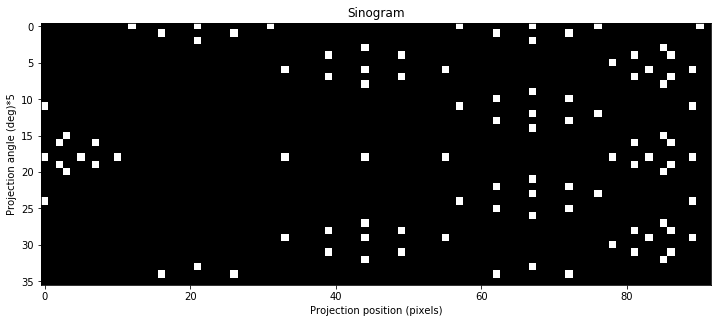

In [1870]:
plt.figure()
fig, (ax2) = plt.subplots(1, 1, figsize = (12,10))
ax2.set_title("Sinogram")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)*5")
plt.imshow(image1, cmap=plt.cm.Greys_r,vmax=1)

In [1871]:
image1.max()

618.0



----

# 1. 이상적인  sinogram 만들기 

In [1872]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale


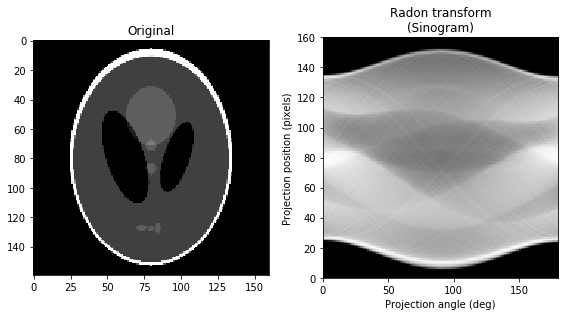

In [1873]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale

image = imread(data_dir + "/phantom.png", as_gray=True)
image = rescale(image, scale=0.4, mode='reflect', multichannel=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

# 2. 원점에서의 sinogram

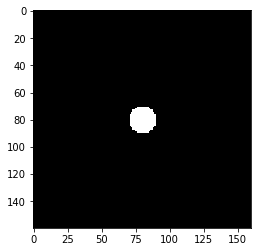

In [1874]:
from skimage import draw


img = np.zeros((160, 160), dtype=np.float64)
rr, cc, = draw.circle(int((img.shape[0]) * .5), int(img.shape[0] * .5), 10)
img[rr, cc] = 1
plt.imshow(img, cmap=plt.cm.Greys_r)

<Figure size 432x288 with 0 Axes>

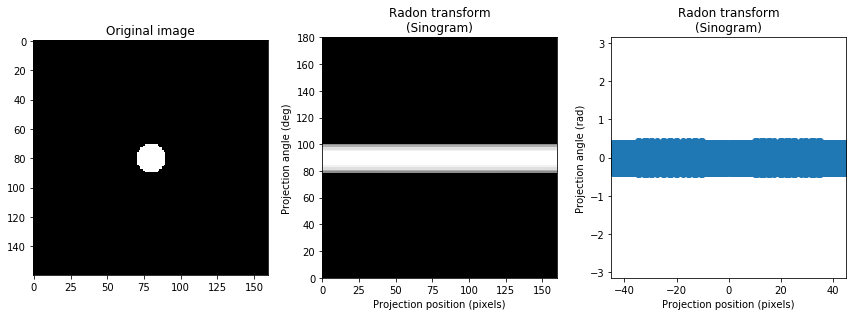

In [1875]:
theta = np.linspace(0, 180, max(image.shape), endpoint=False)
sinogram = radon(img, theta=theta, circle=True)
r_count = ((sinogram.nonzero()[1]/80)-1)*45
theta_count = ((sinogram.nonzero()[0]/80)-1)*np.pi
sinogram = radon(img, theta=theta_count, circle=True)
plt.figure()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,4.5))

ax1.set_title("Original image")
ax1.imshow(img, cmap = plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)")
ax2.imshow(sinogram,cmap =plt.cm.Greys_r,
           extent = (0, sinogram.shape[0],0,180),aspect ='auto')

ax3.set_xlim([-45,45])
ax3.set_ylim([-np.pi, np.pi])
ax3.set_title("Radon transform\n(Sinogram)")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (rad)")

plt.scatter(r_count, theta_count)

fig.tight_layout()
plt.show()

In [1876]:
theta

array([  0.   ,   1.125,   2.25 ,   3.375,   4.5  ,   5.625,   6.75 ,
         7.875,   9.   ,  10.125,  11.25 ,  12.375,  13.5  ,  14.625,
        15.75 ,  16.875,  18.   ,  19.125,  20.25 ,  21.375,  22.5  ,
        23.625,  24.75 ,  25.875,  27.   ,  28.125,  29.25 ,  30.375,
        31.5  ,  32.625,  33.75 ,  34.875,  36.   ,  37.125,  38.25 ,
        39.375,  40.5  ,  41.625,  42.75 ,  43.875,  45.   ,  46.125,
        47.25 ,  48.375,  49.5  ,  50.625,  51.75 ,  52.875,  54.   ,
        55.125,  56.25 ,  57.375,  58.5  ,  59.625,  60.75 ,  61.875,
        63.   ,  64.125,  65.25 ,  66.375,  67.5  ,  68.625,  69.75 ,
        70.875,  72.   ,  73.125,  74.25 ,  75.375,  76.5  ,  77.625,
        78.75 ,  79.875,  81.   ,  82.125,  83.25 ,  84.375,  85.5  ,
        86.625,  87.75 ,  88.875,  90.   ,  91.125,  92.25 ,  93.375,
        94.5  ,  95.625,  96.75 ,  97.875,  99.   , 100.125, 101.25 ,
       102.375, 103.5  , 104.625, 105.75 , 106.875, 108.   , 109.125,
       110.25 , 111.

# 3.  옆으로 조금 옮겼을때의 sinogram

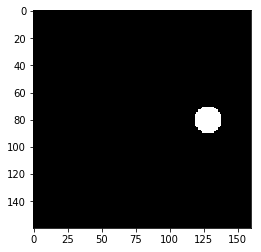

In [1956]:

img2 = np.zeros((160, 160), dtype=np.float64)
rr, cc, = draw.circle(int((img2.shape[0]) * .5), int(img2.shape[0] * .8), 10)
img2[rr, cc] = 1
plt.imshow(img2, cmap=plt.cm.Greys_r)

In [1878]:
img2.shape

(160, 160)

<Figure size 432x288 with 0 Axes>

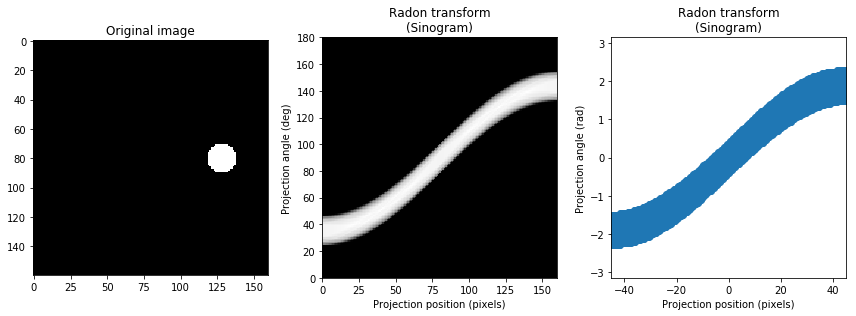

In [1879]:
theta = np.linspace(0, 180, max(img2.shape), endpoint=False)
sinogram = radon(img2, theta=theta, circle=True)
r_count = ((sinogram.nonzero()[1]/80)-1)*45.5
theta_count = ((sinogram.nonzero()[0]/80)-1)*np.pi
plt.figure()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,4.5))

ax1.set_title("Original image")
ax1.imshow(img2, cmap = plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)")
ax2.imshow(sinogram,cmap =plt.cm.Greys_r,
           extent=(0, sinogram.shape[0],0,180),aspect ='auto')

ax3.set_xlim([-45,45])
ax3.set_ylim([-np.pi, np.pi])
ax3.set_title("Radon transform\n(Sinogram)")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (rad)")

plt.scatter(r_count, -theta_count)

fig.tight_layout()
plt.show()

# 4. 위에 데이터를 가지고 만들기

## PHI 값을 리스트 형태로 뽑아냄 ( sinogram을 그리기 위해)

In [1880]:
theta_count = []

for i in range(0,len(c)):
    theta_count.append(c[i][1])
    
theta_count

[-0.28639864383287295,
 0.28639864383287295,
 0.1292208095990492,
 1.5707963267948966,
 1.3335895279112526,
 -0.5236004884846109,
 0.1125132696895968,
 0.6438938560402242,
 0.7608035467411005,
 -0.28639864383287295,
 0.28639864383287295,
 -0.7608035467411005,
 -0.7608035467411005,
 0.7608035467411005,
 -0.5236004884846109,
 -0.5236004884846109,
 1.0471974985115713,
 -1.3335895279112526,
 1.5707963267948966,
 -0.5236004884846109,
 0.5236004884846109,
 0.0,
 1.5707963267948966,
 -0.1125132696895968,
 0.1292208095990492,
 -1.471174457087636,
 0.1292208095990492,
 1.5707963267948966,
 -1.0471974985115713,
 -0.7608035467411005,
 -0.5236004884846109,
 -0.9179775075343741,
 -0.5236004884846109,
 0.6438938560402242,
 -0.28639864383287295,
 0.5236004884846109,
 -0.4033074374378385,
 -0.4033074374378385,
 0.7608035467411005,
 -0.5236004884846109,
 1.471174457087636,
 -1.0471848490249271,
 0.7608035467411005,
 1.5707963267948966,
 1.5707963267948966,
 0.3718929389244348,
 1.5707963267948966,
 0.6

## radian으로 되어 있던걸 degree로 바꿔 줌

In [1881]:
degree = []

for i in range(0,len(theta_count)):
    degree.append(math.degrees(theta_count[i]))
degree
    

[-16.409433549894082,
 16.409433549894082,
 7.4038070152891144,
 90.0,
 76.40905155215867,
 -30.000098141156467,
 6.4465354924311065,
 36.89240040550906,
 43.59083226684912,
 -16.409433549894082,
 16.409433549894082,
 -43.59083226684912,
 -43.59083226684912,
 43.59083226684912,
 -30.000098141156467,
 -30.000098141156467,
 59.999996981370344,
 -76.40905155215867,
 90.0,
 -30.000098141156467,
 30.000098141156467,
 0.0,
 90.0,
 -6.4465354924311065,
 7.4038070152891144,
 -84.29208731857177,
 7.4038070152891144,
 90.0,
 -59.999996981370344,
 -43.59083226684912,
 -30.000098141156467,
 -52.59623686965837,
 -30.000098141156467,
 36.89240040550906,
 -16.409433549894082,
 30.000098141156467,
 -23.107814011424637,
 -23.107814011424637,
 43.59083226684912,
 -30.000098141156467,
 84.29208731857177,
 -59.999272219172624,
 43.59083226684912,
 90.0,
 90.0,
 21.307895831086608,
 90.0,
 36.89240040550906,
 -84.29208731857177,
 43.59083226684912,
 -43.59083226684912,
 -16.409433549894082,
 -30.0000981411

## 데이터 개수 : 8101개

In [1882]:
len(r_count)

3469

In [1883]:
f=[]
for i in range(0,len(theta_count)):
    f.append(math.floor(theta_count[i]))
    
    
f

[-1,
 0,
 0,
 1,
 1,
 -1,
 0,
 0,
 0,
 -1,
 0,
 -1,
 -1,
 0,
 -1,
 -1,
 1,
 -2,
 1,
 -1,
 0,
 0,
 1,
 -1,
 0,
 -2,
 0,
 1,
 -2,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 0,
 -1,
 -1,
 0,
 -1,
 1,
 -2,
 0,
 1,
 1,
 0,
 1,
 0,
 -2,
 0,
 -1,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 0,
 0,
 0,
 -1,
 -1,
 0,
 1,
 -1,
 1,
 0,
 -2,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 0,
 -1,
 0,
 1,
 0,
 0,
 0,
 0,
 -2,
 1,
 -2,
 -2,
 0,
 -2,
 -2,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 -1,
 0,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -2,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -2,
 -1,
 0,
 -2,
 0,
 -1,
 -1,
 0,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 0,
 0,
 -1,
 0,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -2,
 -1,
 -2,
 -1,
 -1,
 -2,
 -2,
 -1,
 0,
 1,
 1,
 0,
 0,
 0,
 -1,
 1,
 0,
 -1,
 -1,
 0,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 0,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 -1,
 -1,
 -2,
 0,
 -2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 -1,
 -2,
 1,
 -2,
 0,
 -2,
 -2,
 -2,
 1,
 0,
 -2,
 -2,
 0,
 0,
 -1,
 0,
 -1,
 0,
 -2,

In [1884]:
r_count = []

for i in range(0,len(c)):
    r_count.append(c[i][0])
    
r_count

[0.0,
 0.0,
 -27.637982270741862,
 44.904,
 -40.53911557921289,
 10.999757996673754,
 18.182028302930476,
 5.460141229733171,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -13.223722924147802,
 -40.53911557921289,
 -44.904,
 10.999757996673752,
 0.0,
 -22.75,
 -44.904,
 -18.182028302930476,
 27.637982270741862,
 -36.94597824927404,
 -27.637982270741862,
 -33.904,
 -13.223722924147804,
 0.0,
 0.0,
 -27.637974672613563,
 0.0,
 -5.460141229733171,
 0.0,
 -39.404116903970554,
 5.460126932693369,
 -5.46012693269337,
 0.0,
 -39.404116903970554,
 36.94597824927404,
 45.49986500804139,
 0.0,
 -33.904,
 33.904,
 -42.38967276737504,
 -39.404,
 -5.460141229733171,
 36.94597824927404,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -33.904,
 -44.9039958991122,
 44.904,
 -23.405241891472507,
 0.0,
 5.46012693269337,
 0.0,
 0.0,
 27.637982270741862,
 33.904,
 0.0,
 -45.49986500804139,
 18.182028302930476,
 -45.49986500804139,
 23.405394676902873,
 -45.49986500804139,
 45.49986500804139,
 0.0,
 5.46012693269

In [1885]:
len(r_count)

8101

## r_count는 theta가 0인 것들만

In [1886]:
r_count2 = []

for i in range(0,len(b)):
    r_count2.append(b[i][0])
    
r_count2

[0.0,
 0.0,
 5.460141229733171,
 -27.637982270741862,
 44.904,
 -40.53911557921289,
 10.999757996673754,
 18.182028302930476,
 5.460141229733171,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -13.224,
 0.0,
 0.0,
 0.0,
 -13.223722924147802,
 -40.53911557921289,
 -44.904,
 10.999757996673752,
 0.0,
 -22.75,
 39.404,
 -44.904,
 -18.182028302930476,
 27.637982270741862,
 -36.94597824927404,
 -27.637982270741862,
 -33.904,
 -13.223722924147804,
 0.0,
 0.0,
 -27.637974672613563,
 0.0,
 -5.460141229733171,
 5.46012693269337,
 0.0,
 -39.404116903970554,
 5.460126932693369,
 -5.46012693269337,
 10.999757996673752,
 0.0,
 -39.404116903970554,
 45.49986500804138,
 36.94597824927404,
 45.49986500804139,
 10.999757996673752,
 0.0,
 -23.405359385595332,
 -33.904,
 33.904,
 -42.38967276737504,
 27.637982270741862,
 -39.404,
 39.404,
 -5.460141229733171,
 36.94597824927404,
 5.460126932693369,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -33.904,
 -44.9039958991122,
 -33.904,
 44.904,
 -23.405241891472507,
 0.0,
 5.4601269

In [1887]:
len(r_count2)

9332

## r_count2는 theta가 0인 아닌것도 포함

In [1888]:
theta_count2 = []
theta_count2
for i in range(0,len(b)):
    theta_count2.append(b[i][1])
    
theta_count2

[-0.28639864383287295,
 0.28639864383287295,
 0.6438938560402242,
 0.1292208095990492,
 1.5707963267948966,
 1.3335895279112526,
 -0.5236004884846109,
 0.1125132696895968,
 0.6438938560402242,
 0.7608035467411005,
 -0.28639864383287295,
 0.28639864383287295,
 -0.7608035467411005,
 -0.7608035467411005,
 0.0,
 0.7608035467411005,
 -0.5236004884846109,
 -0.5236004884846109,
 1.0471974985115713,
 -1.3335895279112526,
 1.5707963267948966,
 -0.5236004884846109,
 0.5236004884846109,
 0.0,
 1.5707963267948966,
 1.5707963267948966,
 -0.1125132696895968,
 0.1292208095990492,
 -1.471174457087636,
 0.1292208095990492,
 1.5707963267948966,
 -1.0471974985115713,
 -0.7608035467411005,
 -0.5236004884846109,
 -0.9179775075343741,
 -0.5236004884846109,
 0.6438938560402242,
 0.4033074374378385,
 -0.28639864383287295,
 0.5236004884846109,
 -0.4033074374378385,
 -0.4033074374378385,
 0.5236004884846109,
 0.7608035467411005,
 -0.5236004884846109,
 -1.0471848490249274,
 1.471174457087636,
 -1.047184849024927

## theta_count2는  theta가 0이 아닌 값도 포함한 phi 값

In [1889]:
len(theta_count2)

9332

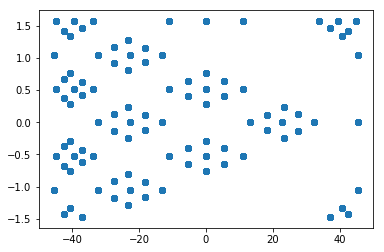

In [1890]:
ax.set_xlabel('radius')
ax.set_ylabel('phi')
plt.scatter(r_count2,theta_count2)

# 대칭이 안되는걸로 보아 detector가 작동을 안하거나 그래프를 만드는것에서 오류가 있었던걸로 추정

## matplot 으로 하니 intensity가 보이지 않아서 image로 돌리기

## image  numpy zero로 선언

In [1917]:
image = np.zeros((180,92), dtype=np.float64)

In [1918]:
image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1919]:
r_count

[0.0,
 0.0,
 -27.637982270741862,
 44.904,
 -40.53911557921289,
 10.999757996673754,
 18.182028302930476,
 5.460141229733171,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -13.223722924147802,
 -40.53911557921289,
 -44.904,
 10.999757996673752,
 0.0,
 -22.75,
 -44.904,
 -18.182028302930476,
 27.637982270741862,
 -36.94597824927404,
 -27.637982270741862,
 -33.904,
 -13.223722924147804,
 0.0,
 0.0,
 -27.637974672613563,
 0.0,
 -5.460141229733171,
 0.0,
 -39.404116903970554,
 5.460126932693369,
 -5.46012693269337,
 0.0,
 -39.404116903970554,
 36.94597824927404,
 45.49986500804139,
 0.0,
 -33.904,
 33.904,
 -42.38967276737504,
 -39.404,
 -5.460141229733171,
 36.94597824927404,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -33.904,
 -44.9039958991122,
 44.904,
 -23.405241891472507,
 0.0,
 5.46012693269337,
 0.0,
 0.0,
 27.637982270741862,
 33.904,
 0.0,
 -45.49986500804139,
 18.182028302930476,
 -45.49986500804139,
 23.405394676902873,
 -45.49986500804139,
 45.49986500804139,
 0.0,
 5.46012693269

In [1920]:
r_counts = np.array(r_count)
r_counts

array([  0.        ,   0.        , -27.63798227, ..., -45.49986501,
       -40.53911558,   5.46014123])

In [1921]:
r_counts  < 0

array([False, False,  True, ...,  True,  True, False])

In [1922]:
r_counts[r_counts<0]

array([-27.63798227, -40.53911558, -13.22372292, ...,  -5.46014123,
       -45.49986501, -40.53911558])

In [1923]:
r_counts = np.array(r_count)
r_counts = r_counts+45.5
r_counts

array([4.55000000e+01, 4.55000000e+01, 1.78620177e+01, ...,
       1.34991959e-04, 4.96088442e+00, 5.09601412e+01])

In [1924]:
degree

[-16.409433549894082,
 16.409433549894082,
 7.4038070152891144,
 90.0,
 76.40905155215867,
 -30.000098141156467,
 6.4465354924311065,
 36.89240040550906,
 43.59083226684912,
 -16.409433549894082,
 16.409433549894082,
 -43.59083226684912,
 -43.59083226684912,
 43.59083226684912,
 -30.000098141156467,
 -30.000098141156467,
 59.999996981370344,
 -76.40905155215867,
 90.0,
 -30.000098141156467,
 30.000098141156467,
 0.0,
 90.0,
 -6.4465354924311065,
 7.4038070152891144,
 -84.29208731857177,
 7.4038070152891144,
 90.0,
 -59.999996981370344,
 -43.59083226684912,
 -30.000098141156467,
 -52.59623686965837,
 -30.000098141156467,
 36.89240040550906,
 -16.409433549894082,
 30.000098141156467,
 -23.107814011424637,
 -23.107814011424637,
 43.59083226684912,
 -30.000098141156467,
 84.29208731857177,
 -59.999272219172624,
 43.59083226684912,
 90.0,
 90.0,
 21.307895831086608,
 90.0,
 36.89240040550906,
 -84.29208731857177,
 43.59083226684912,
 -43.59083226684912,
 -16.409433549894082,
 -30.0000981411

In [1925]:
degrees = np.array(degree)
degrees

array([-16.40943355,  16.40943355,   7.40380702, ...,  59.99927222,
       -76.40905155,  36.89240041])

In [1926]:
degrees <0

array([ True, False, False, ..., False,  True, False])

In [1927]:
degrees[degrees< 0 ] = degrees[degrees< 0 ]+ 180
degrees

array([163.59056645,  16.40943355,   7.40380702, ...,  59.99927222,
       103.59094845,  36.89240041])

In [1928]:
degrees

array([163.59056645,  16.40943355,   7.40380702, ...,  59.99927222,
       103.59094845,  36.89240041])

In [1929]:
degrees[(degrees>5)&(degrees<10)]

array([7.40380702, 6.44653549, 7.40380702, 7.40380702, 7.40380702,
       6.44653549, 6.44653549, 6.44653549, 6.44653549, 7.40380702,
       6.44653549, 7.40380702, 7.40380702, 7.40380702, 7.40380702,
       6.44653549, 7.40380702, 7.40380702, 7.40380702, 7.40380702,
       6.44653549, 6.44653549, 6.44653549, 6.44653549, 7.40380702,
       7.40380702, 7.40380702, 6.44653549, 6.44653549, 6.44653549,
       7.40380702, 6.44653549, 7.40380702, 7.40380702, 7.40380702,
       6.44653549, 7.40380702, 6.44653549, 7.40380702, 6.44653549,
       6.44653549, 7.40380702, 6.44653549, 6.44653549, 7.40380702,
       7.40380702, 7.40380702, 6.44653549, 6.44653549, 7.40380702,
       6.44653549, 6.44653549, 6.44653549, 7.40380702, 7.40380702,
       6.44653549, 6.44653549, 7.40380702, 6.44653549, 6.44653549,
       6.44653549, 6.44653549, 7.40380702, 6.44653549, 7.40380702,
       6.44653549, 7.40380702, 7.40380702, 7.40380702, 7.40380702,
       6.44653549, 6.44653549, 6.44653549, 7.40380702, 6.44653

In [1930]:

for i in range (0,35):
    if np.all(degrees[(degrees>i*5)&(degrees<(i+1)*5)] )>i*5:
        degrees[(degrees>i*5)&(degrees<(i+1)*5)]/5
        
        

In [1931]:
degrees1 = []
for i in range(0,len(degrees)):
    degrees1.append(int(degrees[i]))
                    
degrees1

[163,
 16,
 7,
 90,
 76,
 149,
 6,
 36,
 43,
 163,
 16,
 136,
 136,
 43,
 149,
 149,
 59,
 103,
 90,
 149,
 30,
 0,
 90,
 173,
 7,
 95,
 7,
 90,
 120,
 136,
 149,
 127,
 149,
 36,
 163,
 30,
 156,
 156,
 43,
 149,
 84,
 120,
 43,
 90,
 90,
 21,
 90,
 36,
 95,
 43,
 136,
 163,
 149,
 43,
 163,
 90,
 149,
 90,
 46,
 30,
 23,
 136,
 149,
 7,
 90,
 136,
 59,
 6,
 120,
 166,
 59,
 59,
 163,
 156,
 163,
 16,
 149,
 90,
 143,
 43,
 136,
 30,
 59,
 0,
 6,
 6,
 30,
 98,
 90,
 103,
 103,
 30,
 120,
 120,
 163,
 30,
 23,
 36,
 16,
 30,
 16,
 43,
 43,
 43,
 149,
 76,
 143,
 30,
 136,
 16,
 163,
 136,
 149,
 126,
 95,
 149,
 90,
 149,
 163,
 13,
 59,
 149,
 90,
 136,
 76,
 173,
 173,
 149,
 95,
 136,
 0,
 103,
 0,
 173,
 156,
 0,
 144,
 149,
 30,
 16,
 166,
 172,
 53,
 16,
 127,
 6,
 172,
 149,
 136,
 30,
 30,
 149,
 120,
 172,
 120,
 163,
 136,
 120,
 120,
 149,
 30,
 59,
 84,
 53,
 30,
 43,
 163,
 90,
 0,
 136,
 163,
 43,
 149,
 30,
 163,
 136,
 166,
 90,
 127,
 13,
 163,
 149,
 136,
 30,
 16,
 4

In [1932]:
int_degrees1 = np.array(degrees1)
int_degrees1

array([163,  16,   7, ...,  59, 103,  36])

In [1933]:
degrees2 = int_degrees1/5

degrees3 =[]
for i in range(0,len(degrees2)):
    degrees3.append(int(degrees2[i]))
degrees3

[32,
 3,
 1,
 18,
 15,
 29,
 1,
 7,
 8,
 32,
 3,
 27,
 27,
 8,
 29,
 29,
 11,
 20,
 18,
 29,
 6,
 0,
 18,
 34,
 1,
 19,
 1,
 18,
 24,
 27,
 29,
 25,
 29,
 7,
 32,
 6,
 31,
 31,
 8,
 29,
 16,
 24,
 8,
 18,
 18,
 4,
 18,
 7,
 19,
 8,
 27,
 32,
 29,
 8,
 32,
 18,
 29,
 18,
 9,
 6,
 4,
 27,
 29,
 1,
 18,
 27,
 11,
 1,
 24,
 33,
 11,
 11,
 32,
 31,
 32,
 3,
 29,
 18,
 28,
 8,
 27,
 6,
 11,
 0,
 1,
 1,
 6,
 19,
 18,
 20,
 20,
 6,
 24,
 24,
 32,
 6,
 4,
 7,
 3,
 6,
 3,
 8,
 8,
 8,
 29,
 15,
 28,
 6,
 27,
 3,
 32,
 27,
 29,
 25,
 19,
 29,
 18,
 29,
 32,
 2,
 11,
 29,
 18,
 27,
 15,
 34,
 34,
 29,
 19,
 27,
 0,
 20,
 0,
 34,
 31,
 0,
 28,
 29,
 6,
 3,
 33,
 34,
 10,
 3,
 25,
 1,
 34,
 29,
 27,
 6,
 6,
 29,
 24,
 34,
 24,
 32,
 27,
 24,
 24,
 29,
 6,
 11,
 16,
 10,
 6,
 8,
 32,
 18,
 0,
 27,
 32,
 8,
 29,
 6,
 32,
 27,
 33,
 18,
 25,
 2,
 32,
 29,
 27,
 6,
 3,
 8,
 8,
 3,
 32,
 6,
 27,
 29,
 23,
 6,
 21,
 8,
 3,
 6,
 8,
 14,
 2,
 18,
 4,
 18,
 27,
 21,
 16,
 24,
 0,
 24,
 19,
 20,
 14,
 3,
 19,


In [1934]:
int_degrees3 = np.array(degrees3)
int_degrees3

array([32,  3,  1, ..., 11, 20,  7])

In [1935]:
degrees4 = int_degrees3*5
degrees4
#5 도 간격으로 convert 한것

array([160,  15,   5, ...,  55, 100,  35])

## 5도 간격으로 해서 intensity 확인해보려고 degrees4를 만들어봄

In [1936]:
for i in range(0,len(r_counts)):
    image[int(degrees[i])][int(r_counts1[i]-1)] = image[int(degrees[i])][int(r_counts1[i]-1)] + 1 

## for문을 이용해서 image 의 값을 변경해서 표현

In [1937]:
image

array([[ 0.,  0.,  0., ...,  0., 50.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

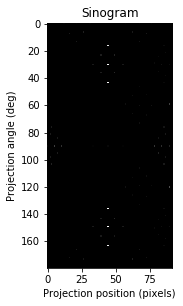

In [1938]:
plt.figure()
fig, (ax1) = plt.subplots(1, 1, figsize = (12,4.5))
ax1.set_title("Sinogram")
ax1.set_xlabel("Projection position (pixels)")
ax1.set_ylabel("Projection angle (deg)")
plt.imshow(image, cmap=plt.cm.Greys_r)

## intensity가 집중된 점들이 일자가 되는 것을 확인할 수 있다.
### annihilation을 원점에서 발생했기 때문에 일자로 나오는것은 맞음

In [1939]:
image.shape

(180, 92)

In [1940]:
image.max()

618.0

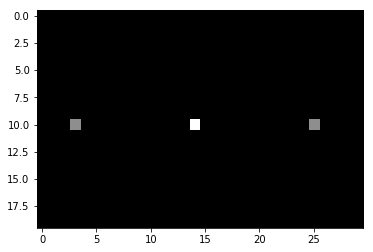

In [1941]:
plt.imshow(image[80:100, 30:60], cmap=plt.cm.Greys_r)

In [1942]:
r_counts1

array([45.5       , 45.5       , 73.13798227, ..., 90.99986501,
       86.03911558, 40.03985877])

In [1943]:
degrees.shape

(8101,)

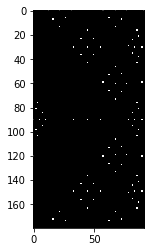

In [1944]:
plt.imshow(image, cmap=plt.cm.Greys_r,vmin=0, vmax=1)

In [1945]:
image.max()

618.0

In [1946]:
np.where(image == 618.0)

(array([149], dtype=int64), array([44], dtype=int64))

In [1947]:
degrees[30]

149.99990185884354

In [1948]:
r_counts[0]

45.5

In [1949]:
cnt = 0

for idx, val in enumerate(zip(degrees, r_counts1)):
    if not (35 < val[1] < 56):
        cnt += 1
        
    if 35 < val[1] < 56:
        print('{0:10.5}{1:10.5}'.format(val[0], val[1]))
    
#     if idx == 2000:
#         break

cnt

    163.59      45.5
    16.409      45.5
    36.892     40.04
    43.591      45.5
    163.59      45.5
    16.409      45.5
    136.41      45.5
    136.41      45.5
    43.591      45.5
     150.0      45.5
     150.0      45.5
      30.0      45.5
    136.41      45.5
     150.0      45.5
     150.0      45.5
    36.892     50.96
    163.59      45.5
    156.89     40.04
    156.89     50.96
    43.591      45.5
    43.591      45.5
    36.892     50.96
    43.591      45.5
    136.41      45.5
    163.59      45.5
     150.0      45.5
    43.591      45.5
    163.59      45.5
      30.0      45.5
    23.108     40.04
    136.41      45.5
     150.0      45.5
    136.41      45.5
    163.59      45.5
    156.89     40.04
    163.59      45.5
    16.409      45.5
     150.0      45.5
    143.11     50.96
    43.591      45.5
    136.41      45.5
      30.0      45.5
      30.0      45.5
      30.0      45.5
    163.59      45.5
      30.0      45.5
    23.108     50.96
    36.892   

    43.591      45.5
      30.0      45.5
    16.409      45.5
     150.0      45.5
      30.0      45.5
    36.892     40.04
    16.409      45.5
    136.41      45.5
    43.591      45.5
      30.0      45.5
     150.0      45.5
     150.0      45.5
    163.59      45.5
    163.59      45.5
    156.89     50.96
     150.0      45.5
    16.409      45.5
      30.0      45.5
    43.591      45.5
     150.0      45.5
    163.59      45.5
    16.409      45.5
     150.0      45.5
    16.409      45.5
      30.0      45.5
    163.59      45.5
    23.108     50.96
    16.409      45.5
    143.11     50.96
    43.591      45.5
    16.409      45.5
    136.41      45.5
     150.0      45.5
    16.409      45.5
    43.591      45.5
      30.0      45.5
    23.108     40.04
    163.59      45.5
    43.591      45.5
    163.59      45.5
    23.108     50.96
    16.409      45.5
      30.0      45.5
    23.108     40.04
    136.41      45.5
      30.0      45.5
    163.59      45.5
     150.0   

     150.0      45.5
    43.591      45.5
    43.591      45.5
    43.591      45.5
      30.0      45.5
    43.591      45.5
    163.59      45.5
      30.0      45.5
    163.59      45.5
    163.59      45.5
    136.41      45.5
      30.0      45.5
    143.11     50.96
    136.41      45.5
    163.59      45.5
    43.591      45.5
      30.0      45.5
      30.0      45.5
    16.409      45.5
    163.59      45.5
     150.0      45.5
      30.0      45.5
     150.0      45.5
      30.0      45.5
    36.892     50.96
    143.11     40.04
      90.0      45.5
    16.409      45.5
    43.591      45.5
    36.892     50.96
    136.41      45.5
    16.409      45.5
    16.409      45.5
     150.0      45.5
    43.591      45.5
    136.41      45.5
    163.59      45.5
      30.0      45.5
    136.41      45.5
    16.409      45.5
    163.59      45.5
    163.59      45.5
    16.409      45.5
    163.59      45.5
      30.0      45.5
    43.591      45.5
     150.0      45.5
     150.0   

    163.59      45.5
    36.892     50.96
    16.409      45.5
     150.0      45.5
    16.409      45.5
      30.0      45.5
      30.0      45.5
    43.591      45.5
      30.0      45.5
    143.11     50.96
    36.892     40.04
    136.41      45.5
      30.0      45.5
    43.591      45.5
    43.591      45.5
      30.0      45.5
     150.0      45.5
     150.0      45.5
    143.11     40.04
     150.0      45.5
    163.59      45.5
    43.591      45.5
    136.41      45.5
    163.59      45.5
    163.59      45.5
     150.0      45.5
     150.0      45.5
     150.0      45.5
     150.0      45.5
    136.41      45.5
    23.108     40.04
    136.41      45.5
      30.0      45.5
    43.591      45.5
    136.41      45.5
      30.0      45.5
    143.11     40.04
    136.41      45.5
      30.0      45.5
      30.0      45.5
    16.409      45.5
    16.409      45.5
      30.0      45.5
     150.0      45.5
    136.41      45.5
    16.409      45.5
    163.59      45.5
    136.41   

      30.0      45.5
    43.591      45.5
      30.0      45.5
    43.591      45.5
     150.0      45.5
    136.41      45.5
    163.59      45.5
    16.409      45.5
    16.409      45.5
    16.409      45.5
      30.0      45.5
     150.0      45.5
     150.0      45.5
     150.0      45.5
    156.89     40.04
    163.59      45.5
    136.41      45.5
     150.0      45.5
    163.59      45.5
    16.409      45.5
    16.409      45.5
    163.59      45.5
     150.0      45.5
    136.41      45.5
     150.0      45.5
    156.89     40.04
      30.0      45.5
    163.59      45.5
    163.59      45.5
    36.892     50.96
    163.59      45.5
    136.41      45.5
     150.0      45.5
     150.0      45.5
    136.41      45.5
    16.409      45.5
    43.591      45.5
     150.0      45.5
    43.591      45.5
    16.409      45.5
    163.59      45.5
    43.591      45.5
     150.0      45.5
     150.0      45.5
     150.0      45.5
    43.591      45.5
    163.59      45.5
    23.108   

4120

In [1950]:
image1 = np.zeros((36,92), dtype=np.float64)
image1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1951]:
int_degrees3.max()

34

In [1952]:
int_degrees3

array([32,  3,  1, ..., 11, 20,  7])

In [1953]:
len(r_counts1)


8101

In [1954]:
r_counts1

array([45.5       , 45.5       , 73.13798227, ..., 90.99986501,
       86.03911558, 40.03985877])

---

In [1908]:
for i in range(0,len(r_counts)):
    image1[int_degrees3[i]][int(r_counts1[i]-1)] = image1[int_degrees3[i]][int(r_counts1[i]-1)] + 1 
    

<Figure size 432x288 with 0 Axes>

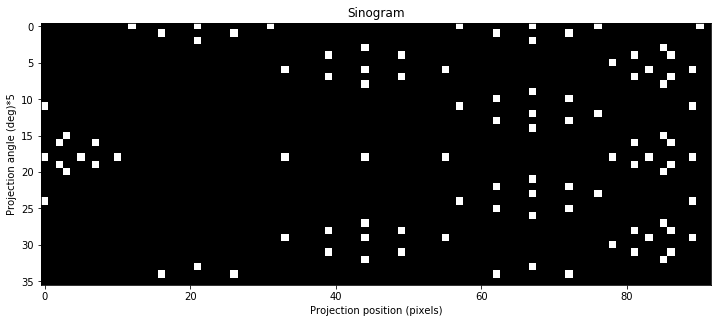

In [1909]:
plt.figure()
fig, (ax2) = plt.subplots(1, 1, figsize = (12,10))
ax2.set_title("Sinogram")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)*5")
plt.imshow(image1, cmap=plt.cm.Greys_r,vmin=0,vmax=1)

## 모든 값들을 1로 줘서 표시한 것

<Figure size 432x288 with 0 Axes>

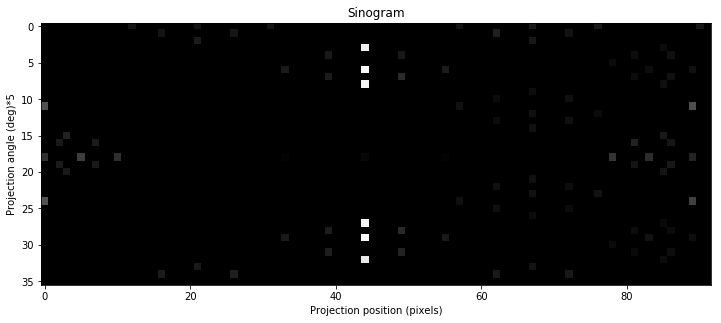

In [1910]:
plt.figure()
fig, (ax2) = plt.subplots(1, 1, figsize = (12,10))
ax2.set_title("Sinogram")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)*5")
plt.imshow(image1, cmap=plt.cm.Greys_r)

## intensity 가 가운데 직렬로 나오는 걸 확인할 수 있다.
## ( 위에 이상적인 sinogram 원점 기준 참고) 
### 잘 보이게 하려고 5도 간격으로 한 것 밑에서 180도 기준으로 한 1도 간격의 sinogram도 있다.

<Figure size 432x288 with 0 Axes>

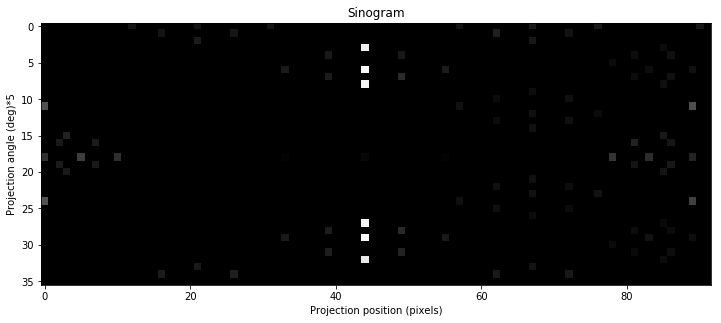

In [1911]:
plt.figure()
fig, (ax2) = plt.subplots(1, 1, figsize = (12,10))
ax2.set_title("Sinogram")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)*5")
plt.imshow(image1, cmap=plt.cm.Greys_r)

In [1915]:
image1

array([[ 0.,  0.,  0., ...,  0., 50.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

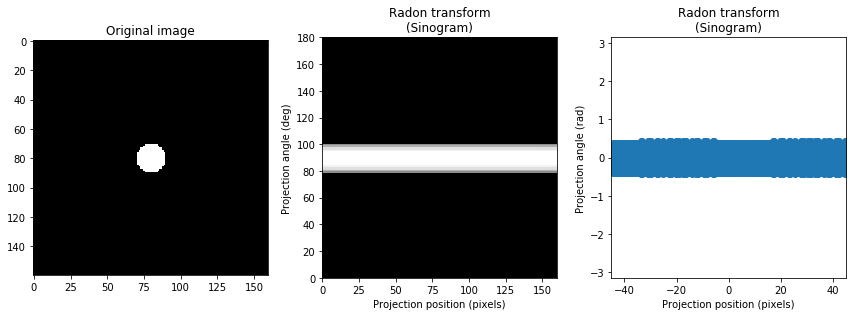

In [1801]:
theta = np.linspace(0, 180, max(image.shape), endpoint=False)
sinogram = radon(img, theta=theta, circle=True)
r_count = ((sinogram.nonzero()[1]/80)-1)*45
theta_count = ((sinogram.nonzero()[0]/80)-1)*np.pi
sinogram = radon(img, theta=theta_count, circle=True)
plt.figure()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,4.5))

ax1.set_title("Original image")
ax1.imshow(img, cmap = plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)")
ax2.imshow(sinogram,cmap =plt.cm.Greys_r,
           extent = (0, sinogram.shape[0],0,180),aspect ='auto')

ax3.set_xlim([-45,45])
ax3.set_ylim([-np.pi, np.pi])
ax3.set_title("Radon transform\n(Sinogram)")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (rad)")

plt.scatter(r_count, theta_count)

fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

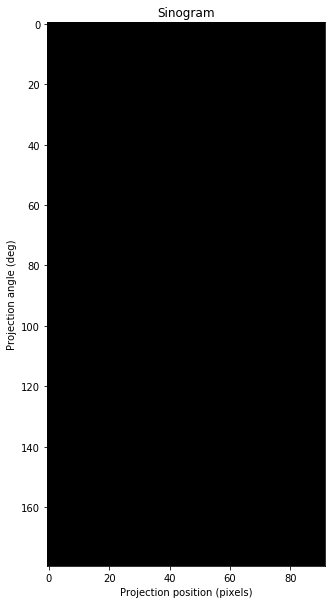

In [1916]:
plt.figure()
fig, (ax1) = plt.subplots(1, 1, figsize = (12,10))
ax1.set_title("Sinogram")
ax1.set_xlabel("Projection position (pixels)")
ax1.set_ylabel("Projection angle (deg)")
plt.imshow(image, cmap=plt.cm.Greys_r,vmin=0,vmax=1)

### 1도 간격의 sinogram 값을 1을 줘서 모든 값들을 표현했다.

In [1803]:
image2 = np.zeros((180,92), dtype=np.float64)
image2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1804]:
for i in range(0,len(r_counts)):
    image2[degrees4[i]][int(r_counts1[i]-1)] = image2[degrees4[i]][int(r_counts1[i]-1)] + 1 
    

<Figure size 432x288 with 0 Axes>

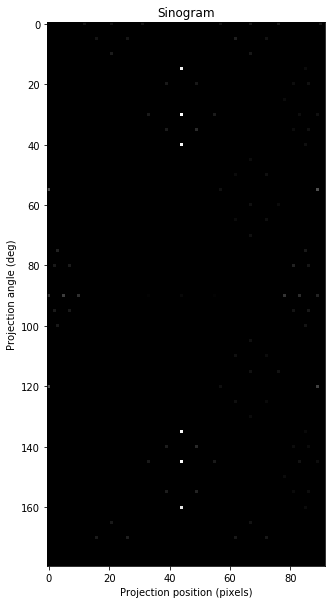

In [1805]:
plt.figure()
fig, (ax3) = plt.subplots(1, 1, figsize = (12,10))
ax3.set_title("Sinogram")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (deg)")
plt.imshow(image2, cmap=plt.cm.Greys_r)

## 1도 간격 sinogram intensity 표시함

In [1806]:
record


[[0.0, 0.28639864383287295, 0.0],
 [0.0, -0.28639864383287295, 0.0],
 [-5.460141229733171, -0.6438938560402242, 0.1418970546041639],
 [27.637982270741862, -0.1292208095990492, 0.0],
 [44.904, 1.5707963267948966, 0.0],
 [40.53911557921289, -1.3335895279112526, 0.0],
 [-10.999757996673754, 0.5236004884846109, 0.0],
 [-18.182028302930476, -0.1125132696895968, 0.0],
 [-5.460141229733171, -0.6438938560402242, 0.0],
 [0.0, -0.7608035467411005, 0.0],
 [0.0, 0.28639864383287295, 0.0],
 [0.0, -0.28639864383287295, 0.0],
 [0.0, 0.7608035467411005, 0.0],
 [0.0, 0.7608035467411005, 0.0],
 [-13.224, 0, 0.1418970546041639],
 [0.0, -0.7608035467411005, 0.0],
 [0.0, 0.5236004884846109, 0.0],
 [0.0, 0.5236004884846109, 0.0],
 [13.223722924147802, -1.0471974985115713, 0.0],
 [40.53911557921289, 1.3335895279112526, 0.0],
 [-44.904, 1.5707963267948966, 0.0],
 [-10.999757996673752, 0.5236004884846109, 0.0],
 [0.0, -0.5236004884846109, 0.0],
 [-22.75, 0, 0.0],
 [39.404, 1.5707963267948966, -0.14189705460416

In [1807]:
b

array([[ 0.        ,  0.28639864,  0.        ],
       [ 0.        , -0.28639864,  0.        ],
       [-5.46014123, -0.64389386,  0.14189705],
       ...,
       [45.49986501, -1.04718485,  0.        ],
       [40.53911558,  1.33358953,  0.        ],
       [-5.46014123, -0.64389386,  0.        ]])

In [1808]:
theta_count2 = []
theta_count2
for i in range(0,len(b)):
    theta_count2.append(b[i][1])
    
theta_count2

[0.28639864383287295,
 -0.28639864383287295,
 -0.6438938560402242,
 -0.1292208095990492,
 1.5707963267948966,
 -1.3335895279112526,
 0.5236004884846109,
 -0.1125132696895968,
 -0.6438938560402242,
 -0.7608035467411005,
 0.28639864383287295,
 -0.28639864383287295,
 0.7608035467411005,
 0.7608035467411005,
 0.0,
 -0.7608035467411005,
 0.5236004884846109,
 0.5236004884846109,
 -1.0471974985115713,
 1.3335895279112526,
 1.5707963267948966,
 0.5236004884846109,
 -0.5236004884846109,
 0.0,
 1.5707963267948966,
 1.5707963267948966,
 0.1125132696895968,
 -0.1292208095990492,
 1.471174457087636,
 -0.1292208095990492,
 1.5707963267948966,
 1.0471974985115713,
 0.7608035467411005,
 0.5236004884846109,
 0.9179775075343741,
 0.5236004884846109,
 -0.6438938560402242,
 -0.4033074374378385,
 0.28639864383287295,
 -0.5236004884846109,
 0.4033074374378385,
 0.4033074374378385,
 -0.5236004884846109,
 -0.7608035467411005,
 0.5236004884846109,
 1.0471848490249274,
 -1.471174457087636,
 1.0471848490249271,


In [1809]:
rad = np.array(theta_count2)
rad

array([ 0.28639864, -0.28639864, -0.64389386, ..., -1.04718485,
        1.33358953, -0.64389386])

In [1810]:
rad[rad< 0 ] = rad[rad< 0 ]+ math.pi
rad

array([0.28639864, 2.85519401, 2.4976988 , ..., 2.0944078 , 1.33358953,
       2.4976988 ])

In [1811]:
r_count2 = []

for i in range(0,len(b)):
    r_count2.append(b[i][0])
    
r_count2

[0.0,
 0.0,
 -5.460141229733171,
 27.637982270741862,
 44.904,
 40.53911557921289,
 -10.999757996673754,
 -18.182028302930476,
 -5.460141229733171,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -13.224,
 0.0,
 0.0,
 0.0,
 13.223722924147802,
 40.53911557921289,
 -44.904,
 -10.999757996673752,
 0.0,
 -22.75,
 39.404,
 -44.904,
 18.182028302930476,
 -27.637982270741862,
 36.94597824927404,
 27.637982270741862,
 -33.904,
 13.223722924147804,
 0.0,
 0.0,
 27.637974672613563,
 0.0,
 5.460141229733171,
 -5.46012693269337,
 0.0,
 39.404116903970554,
 -5.460126932693369,
 5.46012693269337,
 -10.999757996673752,
 0.0,
 39.404116903970554,
 -45.49986500804138,
 -36.94597824927404,
 -45.49986500804139,
 -10.999757996673752,
 0.0,
 23.405359385595332,
 -33.904,
 33.904,
 42.38967276737504,
 -27.637982270741862,
 -39.404,
 39.404,
 5.460141229733171,
 -36.94597824927404,
 -5.460126932693369,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -33.904,
 44.9039958991122,
 -33.904,
 44.904,
 23.405241891472507,
 0.0,
 -5.46012693

In [1812]:
r_counts2 = np.array(r_count2)
r_counts2


array([ 0.        ,  0.        , -5.46014123, ..., 45.49986501,
       40.53911558, -5.46014123])

In [1813]:
r_counts2 <0

array([False, False,  True, ..., False, False,  True])

In [1814]:

r_counts2 = r_counts2+45.5
r_counts2

array([45.5       , 45.5       , 40.03985877, ..., 90.99986501,
       86.03911558, 40.03985877])

In [1815]:
image4 = np.zeros((4,92), dtype=np.float64)
image4

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.

In [1816]:
for i in range(0,len(r_counts2)):
    image4[int(rad[i])][int(r_counts2[i]-1)] = image4[int(rad[i])][int(r_counts2[i]-1)] + 1 
    

<Figure size 432x288 with 0 Axes>

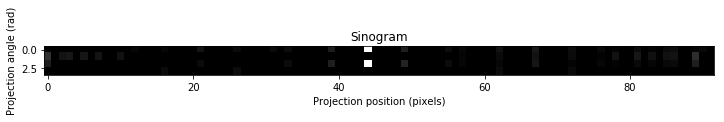

In [1958]:
plt.figure()
fig, (ax4) = plt.subplots(1, 1, figsize = (12,50))
ax4.set_title("Sinogram")
ax4.set_xlabel("Projection position (pixels)")
ax4.set_ylabel("Projection angle (rad)")

plt.imshow(image4, cmap=plt.cm.Greys_r)

In [1818]:
image4.max()

1817.0

In [1819]:
rad.min()

0.0

In [1820]:
rad.max()

3.0290793839001964

r_count 범위를 좀 줄여서 그래프 크기를 맞춰보자 앞에서 degree 줄인것 처럼


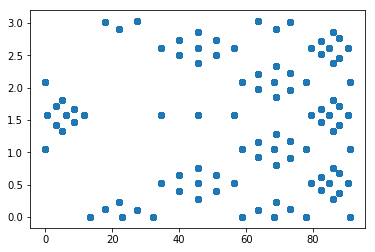

In [1821]:
ax.set_xlabel('radius')
ax.set_ylabel('phi')
plt.scatter(r_counts2,rad)

# atan 부분을 건드렸을 때 sinogram 빈 부분이 바뀌는 걸로 보아
# Zero division Error 피하려고 만든 if 문에 문제가 있는것으로 판단

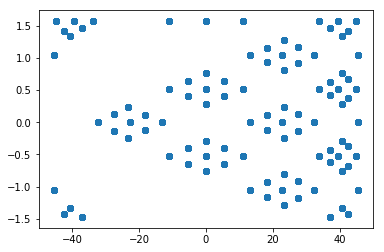

In [1824]:
ax.set_xlabel('radius')
ax.set_ylabel('phi')
plt.scatter(r_count2,theta_count2)

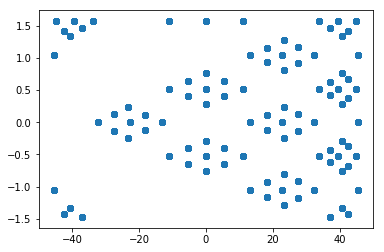

In [1823]:
ax.set_xlabel('radius')
ax.set_ylabel('phi')
plt.scatter(r_count2,theta_count2)

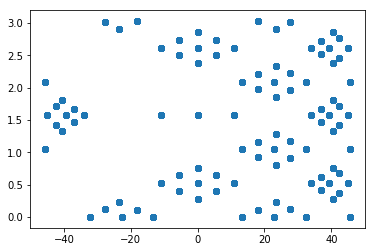

In [1601]:
ax.set_xlabel('radius')
ax.set_ylabel('phi')
plt.scatter(r_counts2,rad)

# 함수 부분을 고치는 것과 그래프 그리는 것의 함수화 
# 라디안으로 고치는 것을 진행해야함


In [1955]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])